**Solución analitica**

$$
f(x) = \left\{
            \begin{array}{ll}
	      \frac{x-190}{400} & \mathrm{si\ } 190<x\leq 210 \\
	      \frac{230-x}{400} & \mathrm{si\ } 210<x\leq 230
            \end{array}
	      \right.\
$$

$$
E(x)=\frac{190+210+230}{3}=210
$$

$$
Var(x)=\frac{190^2+210^2+230^2-190(210)-190(230)-210(230)}{18}=\frac{200}{3}≈66.67
$$

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?

Sea x_i el peso de una tina,

$$
P(x_1+x_2+x_3+x_4+x_5>1000)
$$

Por el Teorema central del límite

$$
P\left(\frac{x_1+x_2+x_3+x_4+x_5}{5}>200\right)=P(\bar{x}>200)=P\left(\frac{\bar{x}-μ}{\frac{σ}{\sqrt{5}}}>\frac{200-210}{\sqrt{\frac{200}{3(5)}}}\right)=P(z>-2.74)
$$

Usando la tabla de valores de normal estandar

$$
P(x_1+x_2+x_3+x_4+x_5>1000)=1-0.0031=0.9969
$$

**Simulación**

Aplicamos transformada inversa

$$
F(x) = \left\{
            \begin{array}{ll}
	      \frac{(x-190)^2}{800} & \mathrm{si\ } 190<x\leq 210 \\
	      1-\frac{(230-x)^2}{800} & \mathrm{si\ } 210<x\leq 230
            \end{array}
	      \right.\
$$

$$
F^{-1}(U) = \left\{
            \begin{array}{ll}
	      190+\sqrt{800U} & \mathrm{si\ } 0<U\leq \frac{1}{2} \\
	      230-\sqrt{800(1-U)} & \mathrm{si\ } \frac{1}{2}<U\leq 1
            \end{array}
	      \right.\
$$

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math

In [2]:
def triangular(a, b, c, n): # Definir la función y generar n repeticiones
    lista = []
    for i in range(n):
        U = rnd.random()
        y = (b-a)/(c-a)
        if 0 <= U <= y:
            X = a + ((b - a)*(c - a)*U)**(1/2)
        else:
            X = c - ((c - b)*(c - a)*(1 - U))**(1/2)
        lista.append(X)
    return lista

In [13]:
# Inicializar contador para las sumas menores a 1000
contador = 0
total_iteraciones = 100000
probabilidades = []

# Repetir el proceso n veces
for i in range(total_iteraciones):
    muestras = triangular(190, 210, 230, 5)
    suma = sum(muestras)
    if suma >= 1000:
        contador += 1

    probabilidad_actual = contador / (i + 1)
    probabilidades.append(probabilidad_actual)

# Calcular la probabilidad
probabilidad = contador / total_iteraciones
print("Número de veces que el peso de las tinas excede la capacidad del camión:", contador)
print("P(suma x >= 1000)=", probabilidad)

Número de veces que el peso de las tinas excede la capacidad del camión: 99763
P(suma x >= 1000)= 0.99763


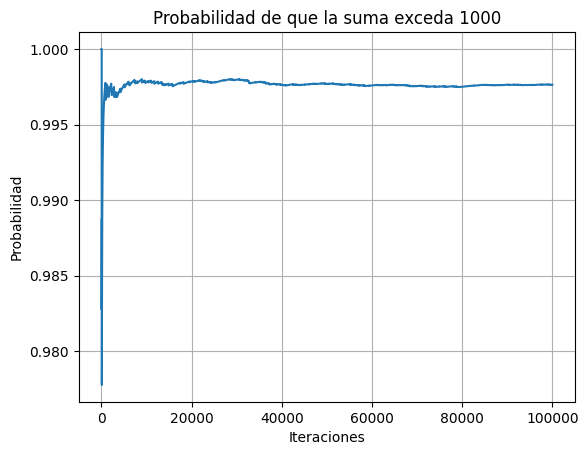

In [15]:
# Generamos la gráfica de la probabilidad
plt.plot(range(1, total_iteraciones + 1), probabilidades)
plt.xlabel('Iteraciones')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que la suma exceda 1000')
plt.grid(True)
plt.show()

In [ ]:
G = triangular(190, 210, 230, 10000) # Obtención de media, varianza y mediana
media = np.mean(G)
varianza = np.var(G)
mediana = np.median(G)
print(f'Mediana: {mediana}')
print(f'Media: {media}')
print(f'Varianza: {varianza}')

Mediana: 210.04420472161914
Media: 210.0483733993799
Varianza: 65.55981823983362


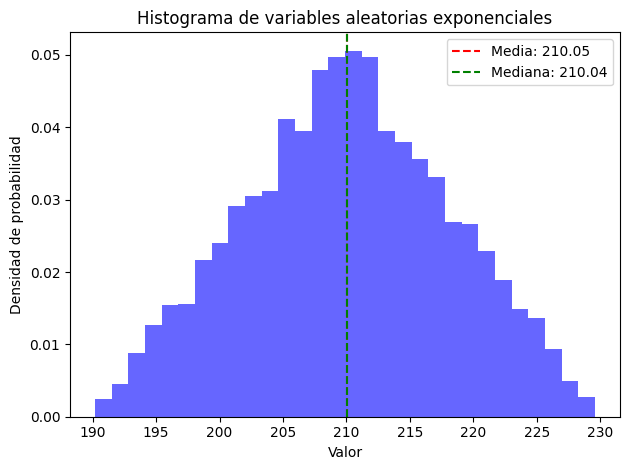

In [ ]:
# Generación del grafico de la función de distribución
plt.hist(G, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}') # Media
plt.axvline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}') # Mediana

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de variables aleatorias exponenciales')
plt.legend()

plt.tight_layout()

plt.tight_layout()
plt.show()

**2.- Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de \$200. También suponga que el costo promedio anual de un nuevo camión es de \$60,000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?**

**Solución analitica**

Dado que solo se laboran 5 días a la semana y son 52 semanas por año, entonces, tomamos en cuenta 260 días habiles.

La probabilidad de que el peso de las tinas exceda la capacidad del camión es del $99.69\%$, así

$$
260días*0.9969*\$200=\$51838.8
$$

Finalmente, en un año se gastan $51838.8 en enviar tinas a otra compañia, esto es menor al costo de un nuevo camion, por lo tanto la mejor alternativa es seguir pagando por los excedentes.

**Simulación**

In [ ]:
# Realizamos el analizis para un año
contador = 0
total_iteraciones = 5*52

# Repetir el proceso n veces
for i in range(total_iteraciones):
    muestras = triangular(190, 210, 230, 5)
    suma = sum(muestras)
    if suma >= 1000:
        contador += 1

# Calcular el costo total
costo_total = contador * 200
print("Número de veces que el peso de las tinas excede la capacidad del camión:", contador)
print("Costo total por año de enviar una tina a otra compañía: $", costo_total)

Número de veces que el peso de las tinas excede la capacidad del camión: 258
Costo total por año de enviar una tina a otra compañía: $ 51600


In [ ]:
if costo_total > 60000:
    print("La segunda alternativa es la más atractiva")
else:
    print("La primera alternativa es la más atractiva")

La primera alternativa es la más atractiva


In [38]:
# Analizis para n años
total_repeticiones = 100
total_iteraciones = 5 * 52
costos_totales = []

for i in range(total_repeticiones):
    contador = 0
    for j in range(total_iteraciones):
        muestras = triangular(190, 210, 230, 5)
        suma = sum(muestras)
        if suma >= 1000:
            contador += 1

    costo_total = contador * 200
    costos_totales.append(costo_total)

# Estadísticas
promedio_costo = sum(costos_totales) / total_repeticiones
#print("Costos totales en cada repetición:", costos_totales)
print("Promedio del costo total por año: $", promedio_costo)

if costo_total > 60000:
    print("La segunda alternativa es la más atractiva")
else:
    print("La primera alternativa es la más atractiva")

Promedio del costo total por año: $ 51848.0
La primera alternativa es la más atractiva


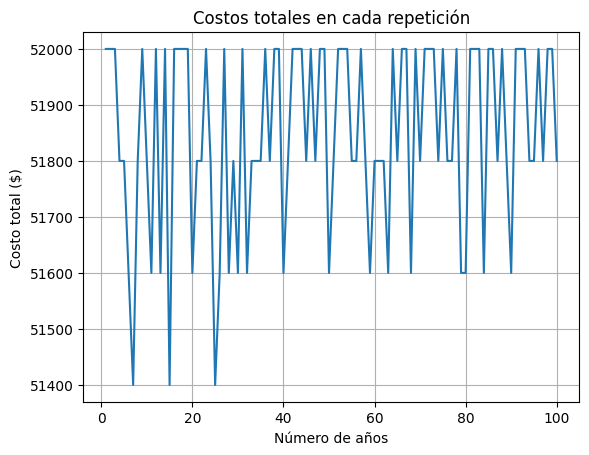

In [43]:
# Gráfica de los costos totales en cada repetición
plt.plot(range(1, total_repeticiones + 1), costos_totales)
plt.xlabel('Número de años')
plt.ylabel('Costo total ($)')
plt.title('Costos totales en cada repetición')
plt.grid(True)
plt.show()